In this notebook, we will try to detect a coin from an image using dlib. Let's import necessary modules

In [1]:
import glob, os, dlib
import pandas as pd
import ntpath
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
%matplotlib inline

I've selected 15 images randomly and annotated them using Imglab. That annotation file can be found here https://gist.github.com/qmaruf/f6740ff448dfcea5227fb0f8f4cad0c5

In [2]:
# annotation images and xml file
annotation_folder = '/media/maruf/resource2/kaggle/brazilian_coin/annotations/'
# rest of the images for testing
coins = glob.glob('/media/maruf/resource2/kaggle/brazilian_coin/all/*.jpg')

In [3]:
# necessary settings for dlib, taken from dlib site.
options = dlib.simple_object_detector_training_options()
options.add_left_right_image_flips = True
options.C = 5
options.num_threads = 4
options.be_verbose = True
training_xml_path = os.path.join(annotation_folder, "training.xml")

In [4]:
# training
dlib.train_simple_object_detector(training_xml_path, "detector.svm", options)
# loading detector
detector = dlib.simple_object_detector("detector.svm")

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291230.jpg


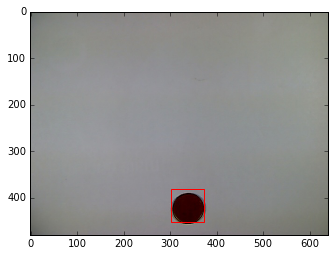

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291236.jpg


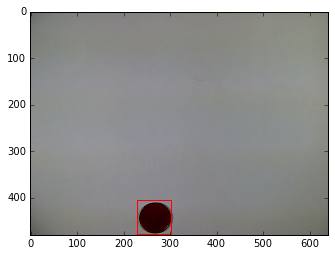

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291242.jpg


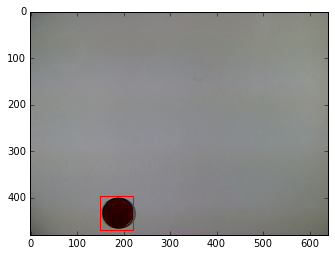

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291248.jpg


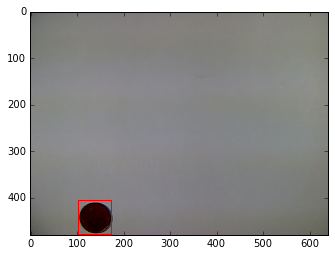

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291254.jpg


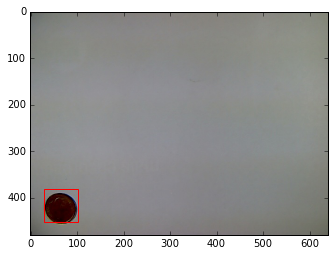

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291260.jpg


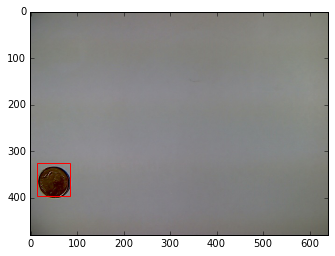

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291266.jpg


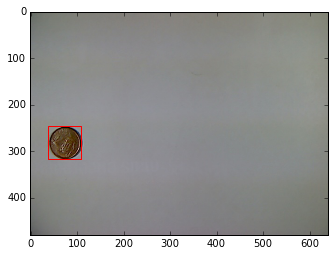

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291272.jpg


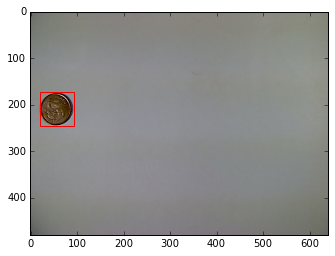

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291278.jpg


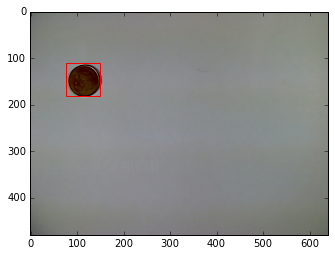

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291284.jpg


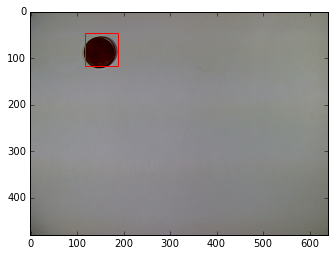

/media/maruf/resource2/kaggle/brazilian_coin/all/5_1477291290.jpg


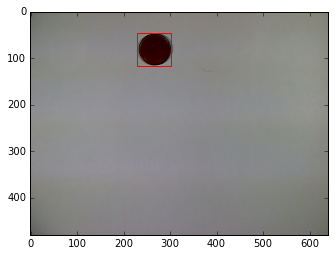

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286976.jpg


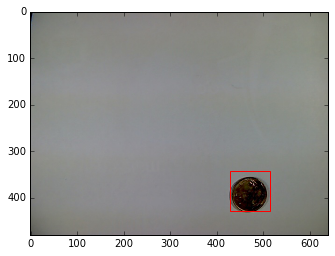

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286982.jpg


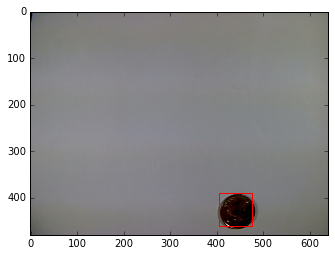

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286988.jpg


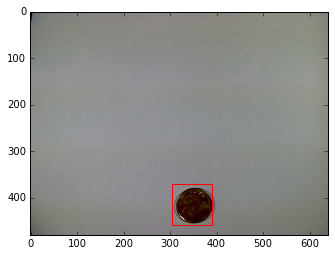

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286994.jpg


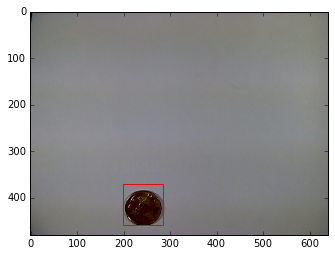

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287000.jpg


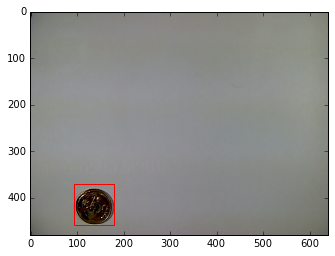

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287006.jpg


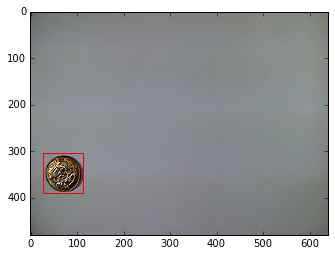

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287012.jpg


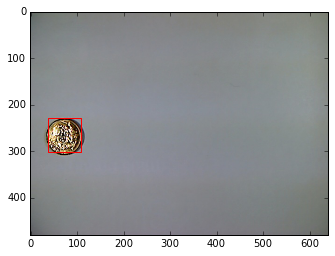

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287018.jpg


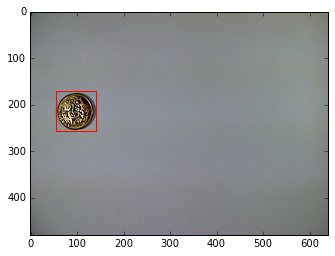

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287024.jpg


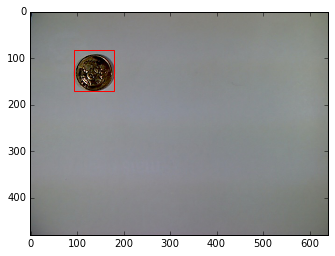

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287030.jpg


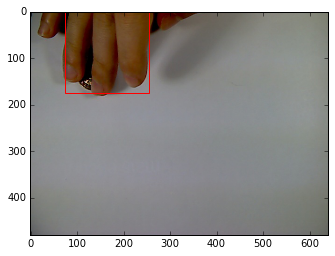

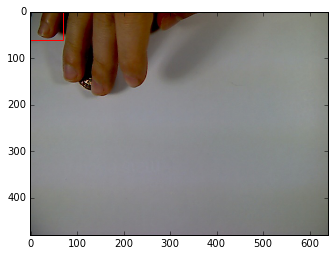

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287048.jpg


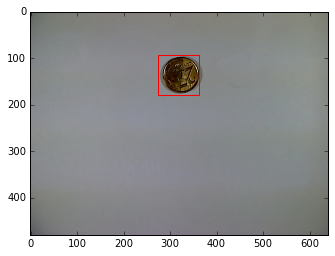

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287054.jpg


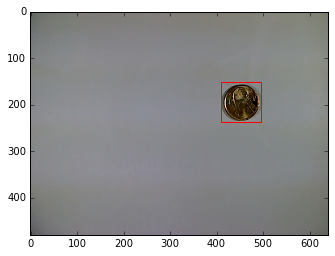

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287060.jpg


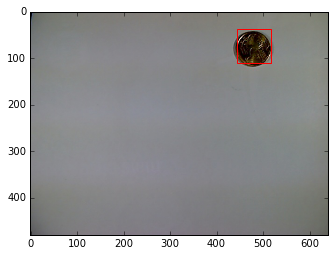

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287066.jpg


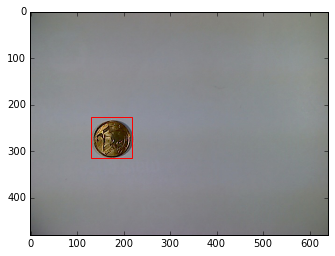

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287072.jpg


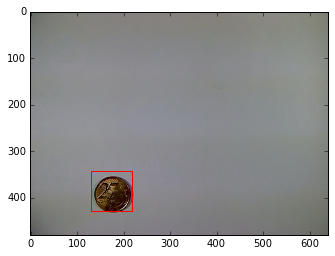

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477287078.jpg


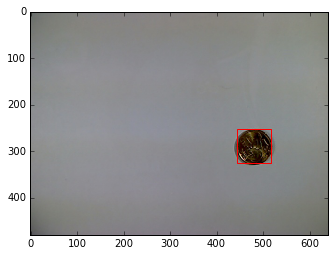

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289412.jpg


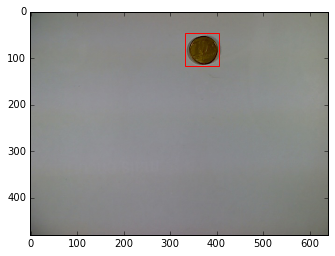

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289418.jpg


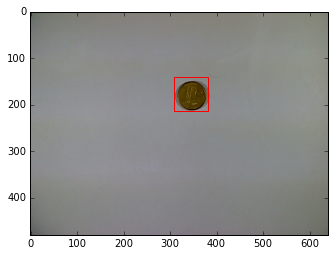

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289424.jpg


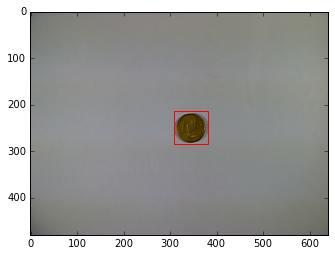

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289430.jpg


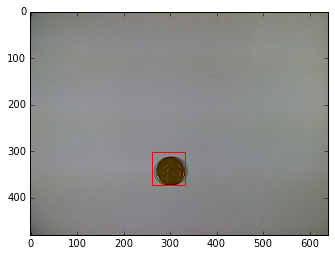

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289436.jpg


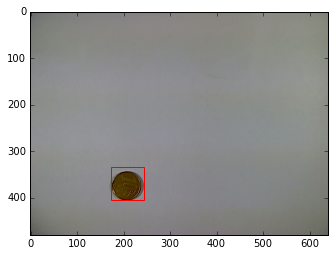

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289442.jpg


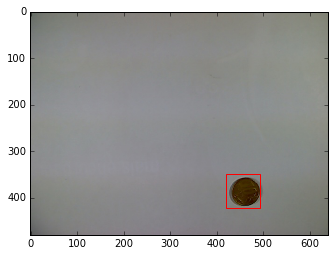

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289448.jpg


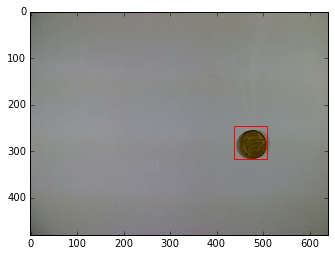

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289454.jpg


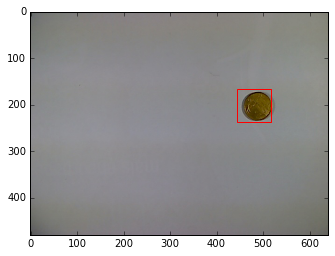

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289460.jpg


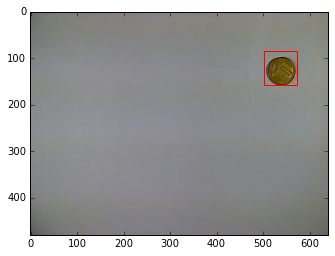

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289466.jpg


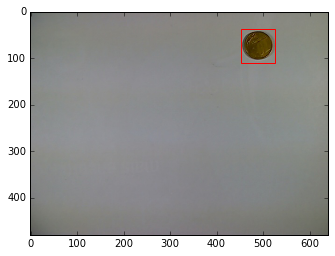

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289472.jpg


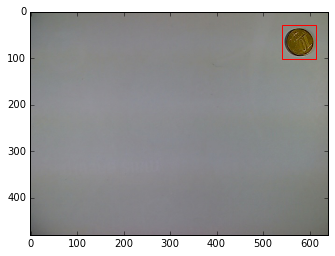

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289478.jpg


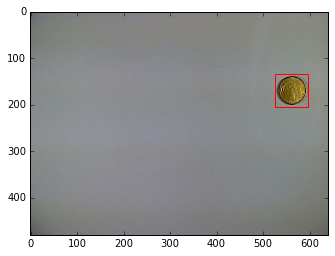

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289484.jpg


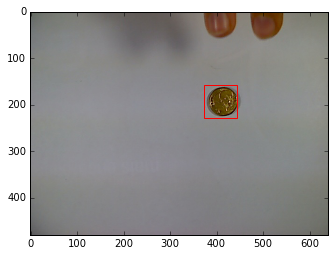

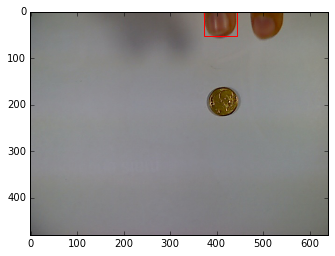

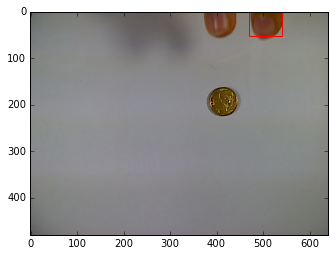

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289490.jpg


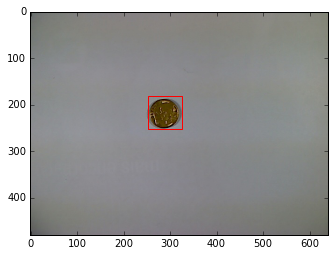

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289496.jpg


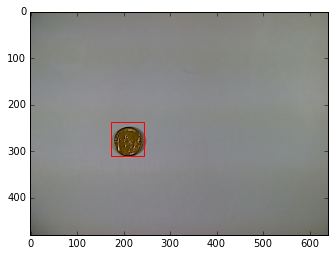

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477289520.jpg


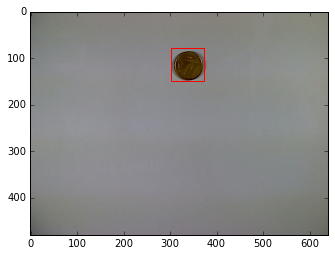

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193244.jpg


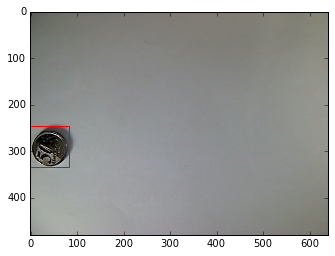

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193250.jpg


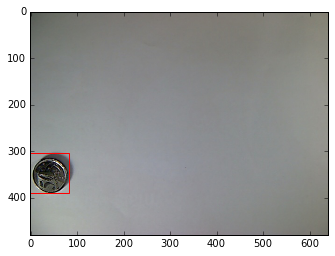

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193256.jpg


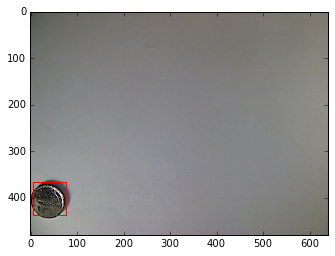

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193262.jpg


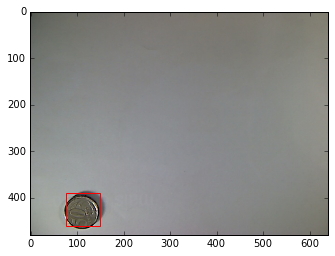

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193268.jpg


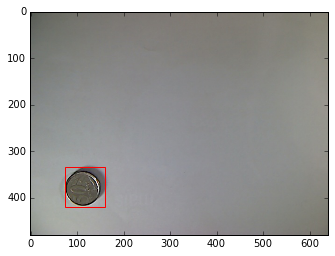

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193274.jpg


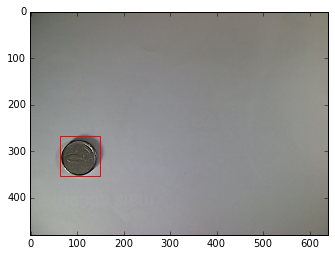

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193280.jpg


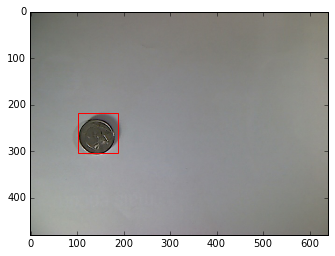

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193286.jpg


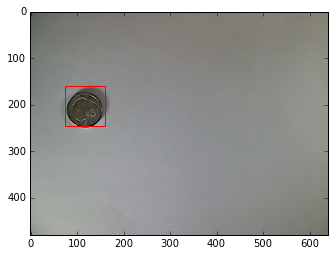

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193292.jpg


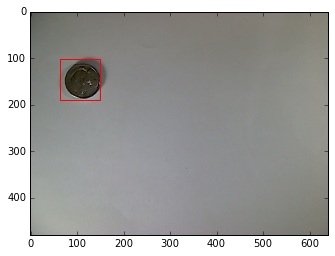

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193298.jpg


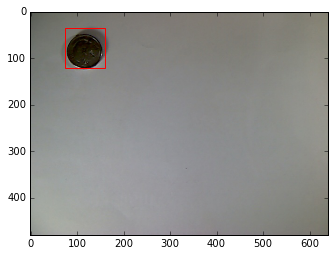

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193304.jpg


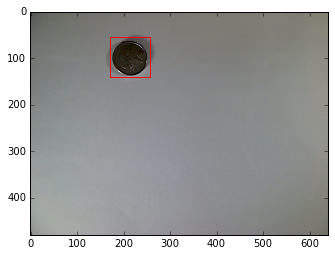

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193310.jpg


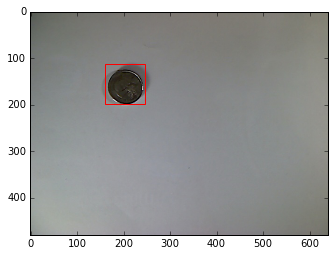

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193316.jpg


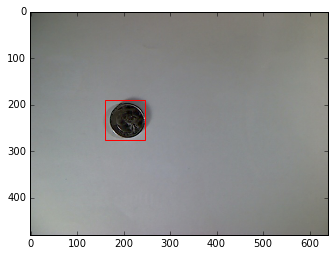

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193322.jpg


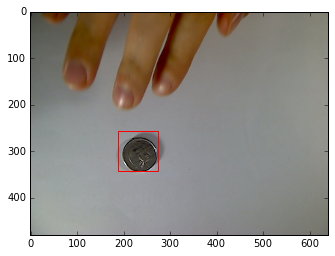

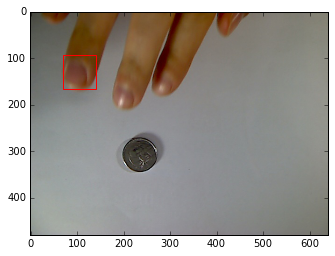

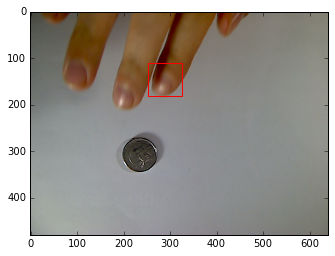

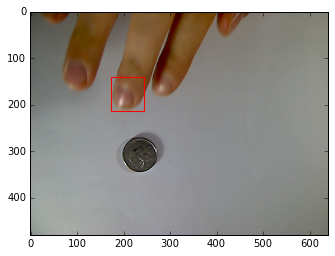

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193328.jpg


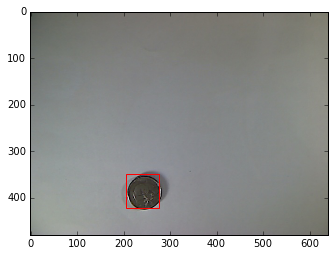

/media/maruf/resource2/kaggle/brazilian_coin/all/50_1477193334.jpg


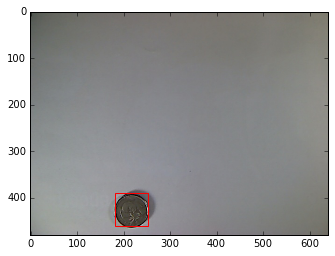

In [5]:
# localization
for n, coin in enumerate(coins[3000:]):    
    img = plt.imread(coin)
    print coin
    dets = detector(img)    
    for k, d in enumerate(dets):
        left = d.left()
        top = d.top()
        width = d.right() - d.left()
        height = d.bottom() - d.top()        
        fig,ax = plt.subplots(1)
        ax.imshow(img)
        rect = patches.Rectangle((left, top),width, height,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)        
        plt.show()
        plt.figure(n)

As we can see, coin localization is not 100% accurate. May be we should increase training size. For classification purpose we need to localize and annotate these coins. We can use dlib to localize the quickly and create the annotation based on file name.

Is there any way to evaluate the localization without checking all images explicitly?

Let's do something funny. We will use the area of the rectangle as a feature. According to the spec, the distance between coins and camera is fixed.

In [13]:
values = []
areas = []
for n, coin in tqdm(enumerate(coins)):    
    img = plt.imread(coin)    
    value = ntpath.basename(coin).split('_')[0]    
    dets = detector(img)  
    if len(dets) > 0:
        d = dets[0]    
        left = d.left()
        top = d.top()
        width = d.right() - d.left()
        height = d.bottom() - d.top()        
        areas.append(width*height)
        values.append(value)        


0it [00:00, ?it/s]
3it [00:00, 21.66it/s]
6it [00:00, 21.72it/s]
9it [00:00, 21.84it/s]
12it [00:00, 22.00it/s]
15it [00:00, 22.05it/s]
18it [00:00, 22.14it/s]

21it [00:00, 22.17it/s]
24it [00:01, 22.21it/s]
27it [00:01, 22.29it/s]
30it [00:01, 22.25it/s]
33it [00:01, 22.31it/s]
36it [00:01, 22.28it/s]
39it [00:01, 22.28it/s]
42it [00:01, 22.23it/s]
45it [00:02, 22.27it/s]
48it [00:02, 22.23it/s]
51it [00:02, 22.23it/s]
54it [00:02, 22.22it/s]
57it [00:02, 22.23it/s]
60it [00:02, 22.26it/s]
63it [00:02, 22.23it/s]
66it [00:02, 22.25it/s]
69it [00:03, 22.17it/s]
72it [00:03, 22.21it/s]
75it [00:03, 22.13it/s]
78it [00:03, 22.00it/s]
81it [00:03, 21.92it/s]
84it [00:03, 21.74it/s]
87it [00:03, 21.81it/s]
90it [00:04, 21.88it/s]
93it [00:04, 21.97it/s]
96it [00:04, 22.03it/s]
99it [00:04, 22.10it/s]
102it [00:04, 22.12it/s]
105it [00:04, 22.16it/s]
108it [00:04, 22.13it/s]
111it [00:05, 22.16it/s]
114it [00:05, 22.10it/s]
117it [00:05, 22.07it/s]
120it [00:05, 22.07it/s]
123it [00:05, 2

In [20]:
# Now put all coin value and corresponding bounding box area in a dataframe for visualization purpose.

In [29]:
df = pd.DataFrame({'value': map(int, values), 'area': areas})

In [31]:
df.sample(10)

area  value
890   7396     25
1704  7569     50
2754  5184     50
2283  7482    100
1965  7396    100
822   5184     10
429   5184    100
1564  7396    100
832   5184      5
2886  7569     25

Let's see the average area of each type of coin.

/home/maruf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


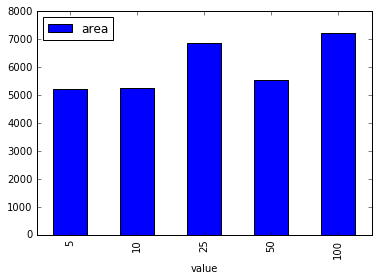

In [34]:
df.groupby('value').mean().sort().plot(kind='bar')

In [35]:
df.groupby('value').mean()

area
value             
5      5227.788333
10     5254.553897
25     6861.038017
50     5550.458658
100    7213.303777

Hmmm. We need more experiment in this area. Average area for coin 5 and 10 are almost same. Badluck :(
Can logistic regression help us? Let's see.

In [61]:
value_idx = {5:1, 10:2, 25:3, 50:4, 100:5}
df2 = df.copy()
df2.value = df2.value.map(value_idx)

In [60]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5)
X = df2.area
y = df2.value
model = LogisticRegression()

for train_index, test_index in kf.split(df2):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = X_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test.reshape(-1, 1))
    acc_score = accuracy_score(y_pred, y_test)
    print acc_score

0.297385620915
0.333333333333
0.271241830065
0.325695581015
0.212765957447


/home/maruf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/maruf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/maruf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Very bad accuray. We should change the approach.